# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

Shape: (1024, 768, 3)
Data type: uint8


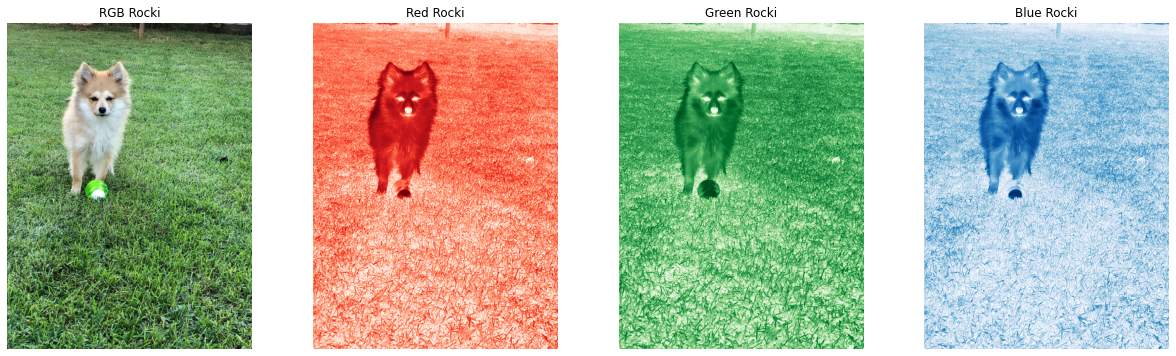

In [1]:
import matplotlib.pyplot as plt
from skimage import io

# We read the rocki image
rocki = io.imread('images_notebook/rocki.jpeg')

# We print its shape and type
print('Shape:', rocki.shape)
print('Data type:', rocki.dtype)

# We create the figure where we will show all the images
fig, axs = plt.subplots(ncols=4, figsize=(21, 6))

# We show the original image
axs[0].imshow(rocki)
axs[0].title.set_text('RGB Rocki')
axs[0].axis('off')

'''
We used the cmap Reds, Greens, Blues for the individual channels instead of the usual gray,
because it's another way to show the intensity of the channel and is more visual.
Instead of 0=black and 1=white, this uses 0=white and 1=red/green/blue
'''

# We show the red channel image, by passing the first channel (0)
axs[1].imshow(rocki[:, :, 0], cmap='Reds')
axs[1].title.set_text('Red Rocki')
axs[1].axis('off')

# We show the red channel image, by passing the second channel (1)
axs[2].imshow(rocki[:, :, 1], cmap='Greens')
axs[2].title.set_text('Green Rocki')
axs[2].axis('off')

# We show the red channel image, by passing the third channel (2)
axs[3].imshow(rocki[:, :, 2], cmap='Blues')
axs[3].title.set_text('Blue Rocki')
axs[3].axis('off')

plt.show()

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)


<!--img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'-->

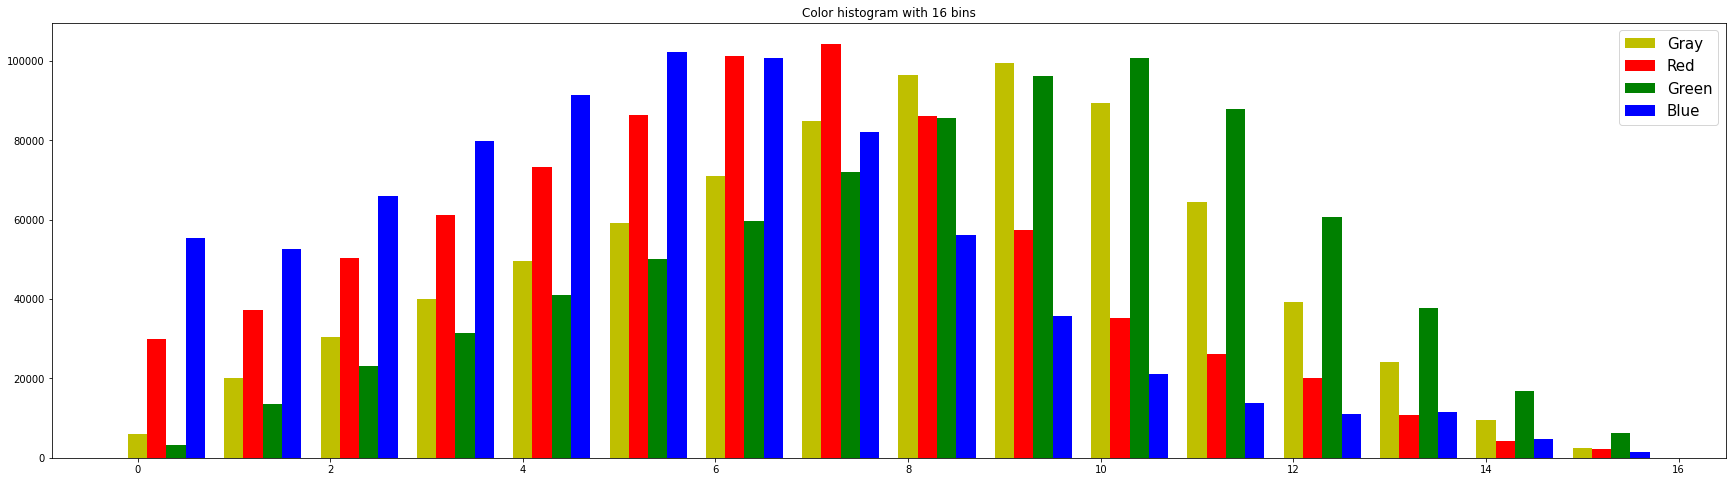

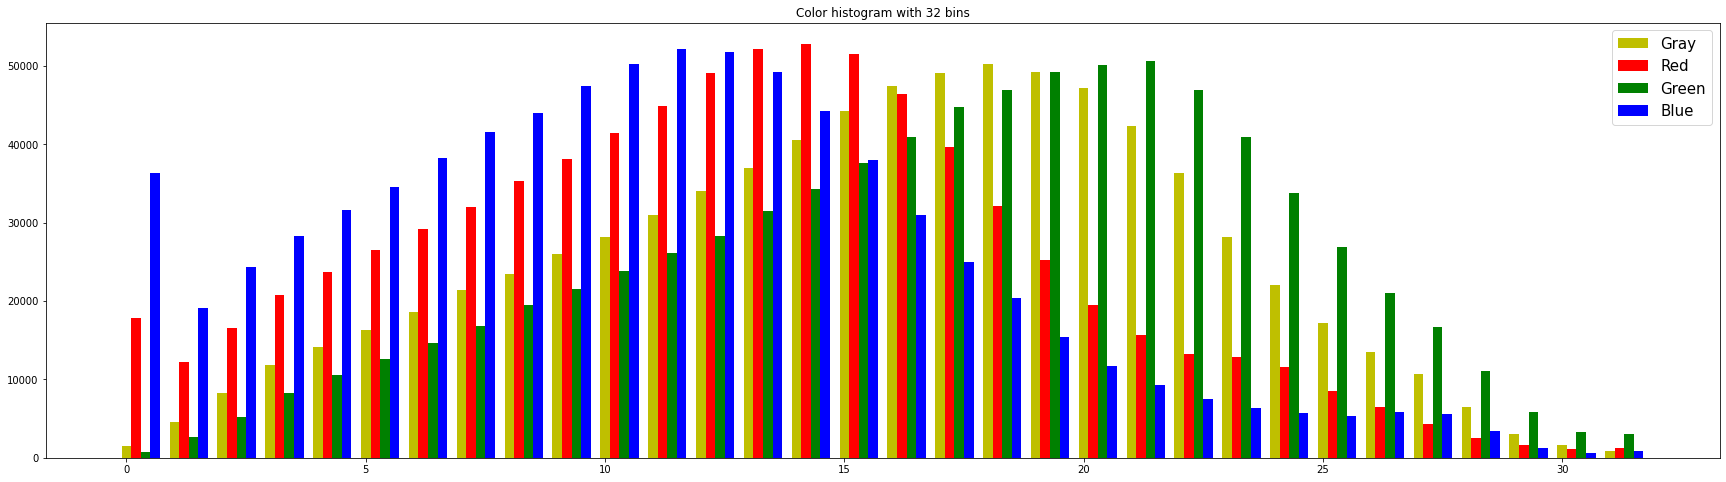

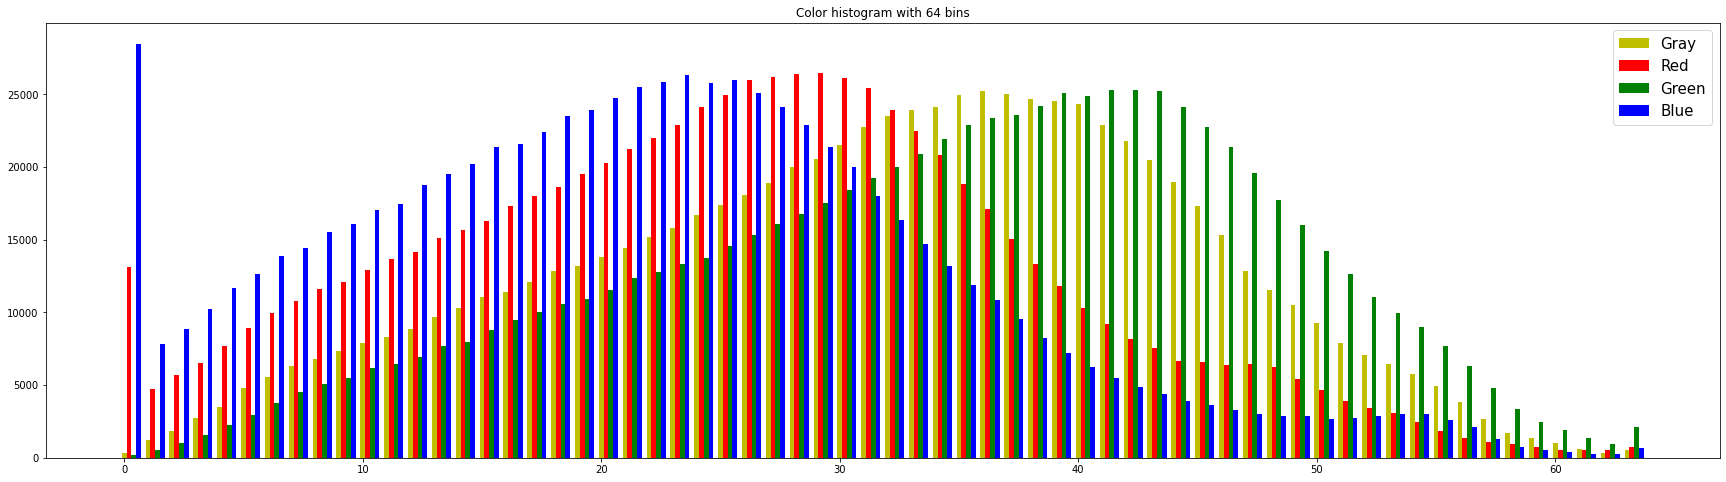

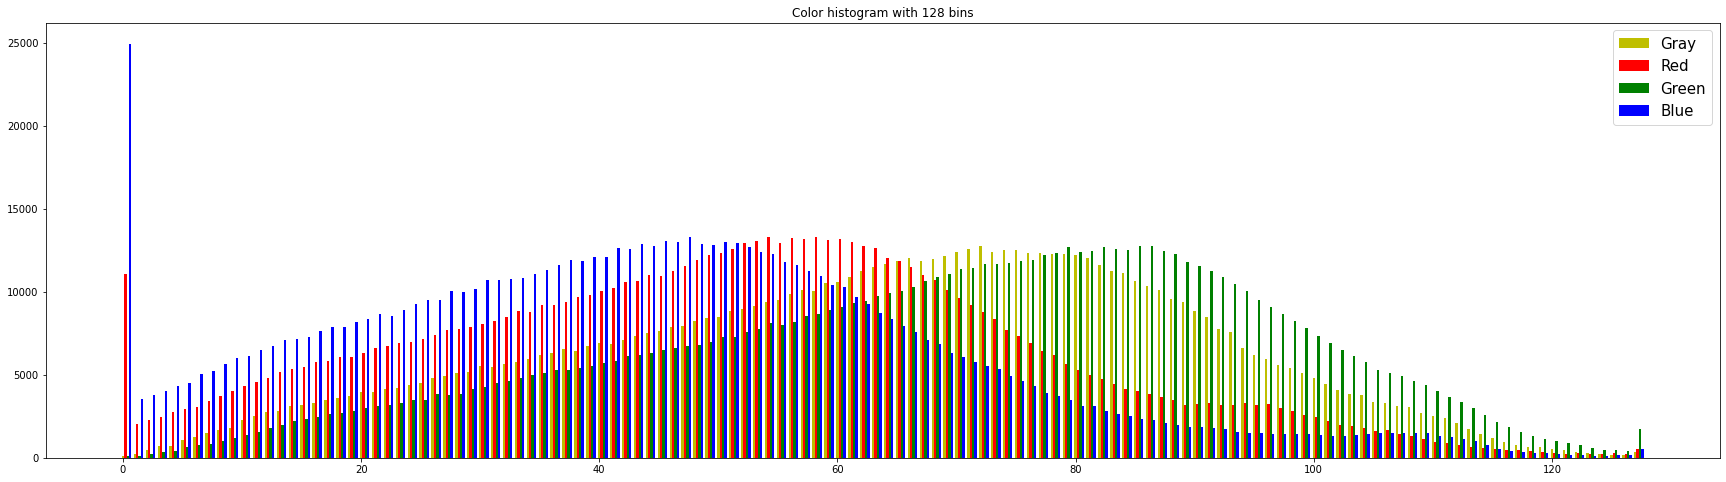

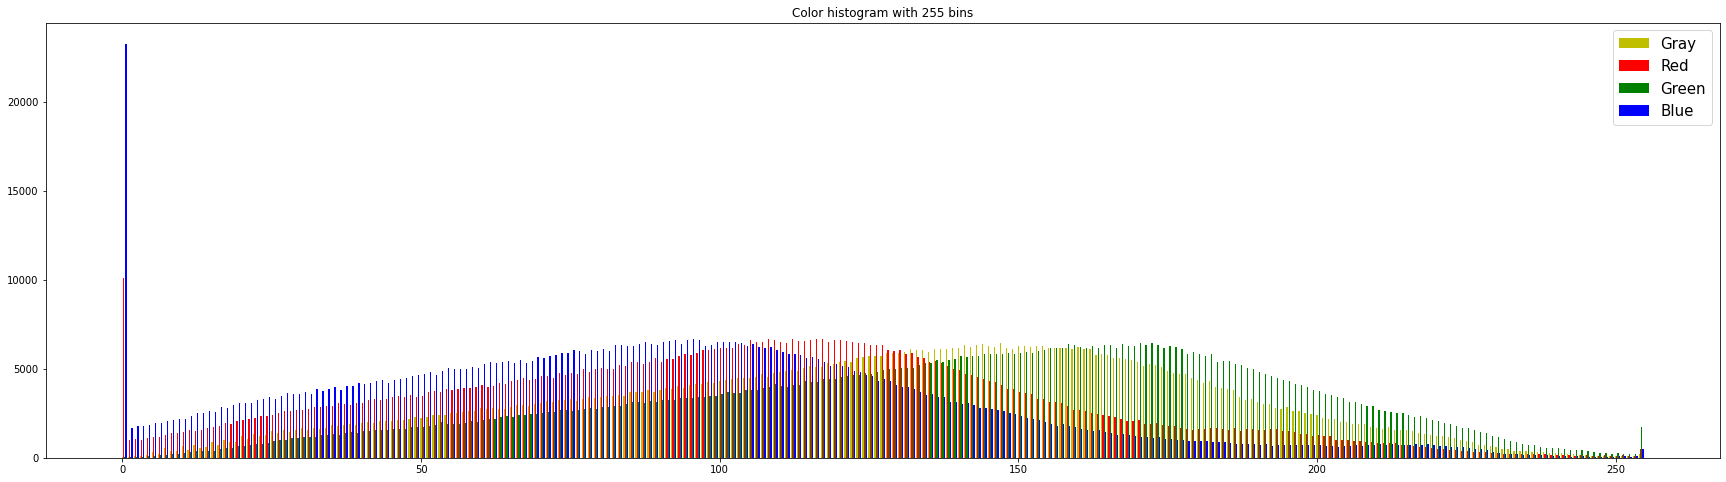

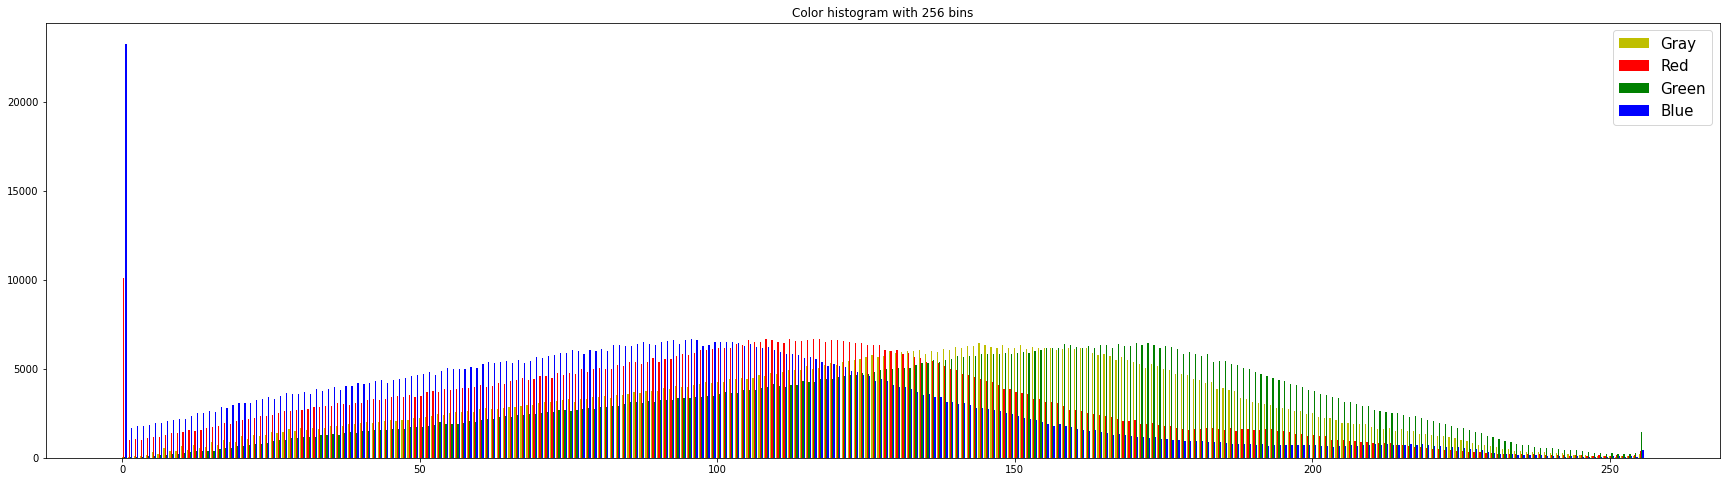

In [2]:
from skimage.exposure import histogram
from skimage.color import rgb2gray
import numpy as np

'''
The type of the image must be float, because with other types such as uint8 the number of bin
parameter doesn't work for some reason.

The bins represent certain ranges (of the same size) of pixels whose intensity is counted as a single
group of values. We divide the range [0, 255] into nbins intervals of the same length, and then show
the frequency of each interval in the histogram. We numbered the intervals from 0 to nbins - 1

By observing the histograms we can see that the interval frequencies are quite continuous, which makes
sense because the colors in the image are gradual to things like the light of the image. We can also
see that each channel is centered around some value, probably the average color of the grass, which has
a lot of green and some red and blue
'''

def im_hist(im, nbins=8):

    # We transform the image to gray and multiply by 255 so it has the same scale as the colored one
    gray_im = 255 * rgb2gray(im)

    # We create all the histograms, setting the number of bins and passing the correct channel everytime as float matrices
    gray_hist = histogram(gray_im, nbins=nbins)
    red_hist = histogram(im[:, :, 0].astype(float), nbins=nbins)
    green_hist = histogram(im[:, :, 1].astype(float), nbins=nbins)
    blue_hist = histogram(im[:, :, 2].astype(float), nbins=nbins)

    # We use a range to properly space the histogram bars
    ind = np.arange(nbins)

    # We create the figure where the barplot will be shown
    fig = plt.figure(figsize=(30, 8))

    # Here we create the different bars, one for each color and separating it using the previously created variable 'ind' (same procedure as in the tutorial)
    cl_gray = plt.bar(ind, gray_hist[0], 0.2, color='y')
    cl_red = plt.bar(ind+.2, red_hist[0], 0.2, color='r')
    cl_green = plt.bar(ind+.4, green_hist[0], 0.2, color='g')
    cl_blue = plt.bar(ind+.6, blue_hist[0], 0.2, color='b')

    # We create a legend to show the representation of each color
    plt.title(f'Color histogram with {nbins} bins')
    plt.legend((cl_gray[0], cl_red[0], cl_green[0], cl_blue[0]), ('Gray', 'Red', 'Green', 'Blue'), prop={'size': 15})
    plt.show()

for nbins in [16, 32, 64, 128, 255, 256]:
    im_hist(rocki, nbins)

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


In [3]:
from skimage.transform import resize
from skimage.color import rgb2gray
from scipy.ndimage import convolve

'''
Convolving a matrix is a linear operation which puts at each pixel the result of multiplying
element at element the mask centered at the pixel and the fragment of the image where the mask
overlaps. If we want to keep the same colors of the same image we need to normalize the mask.

The mask_h1d puts at each pixel the average of the pixel and the 7 ones at either side of it.
It smooths the image horizontally, as we can see the horizontally stretched eyes of the dog.

The transposed mask_h1d is the same but vertically, it averages the pixel and the 7 upper and
lower ones, smoothing the image vertically. We can see the eyes of the dog stretched vertically.

The mask_h2s (in both directions) simply smooths the image, putting at each pixel the mean of
all the values in the square 15x15 centered at the pixel. It loses a lot of quality, but with
lower size could be used to remove some noise, but gaussian tends to be better.
'''

# We will use the method resize since we want to turn a rectangular image into a square image
rocki_thick = resize(rocki, (256, 256, 3))

# We will transform it into a gray image as asked
rocki_gray = rgb2gray(rocki_thick)

# We will creat both the one-dimensional and two-dimensional 1's mask 
mask_h1d = np.ones((1, 15))
mask_h2d = np.ones((15, 15))

# We use a lambda expression to normalize a vector/matrix
norm = lambda M: M / M.sum()

# Convolution with the (1, 15) 1's mask, note that we pass a normalization of the mask
rocki1 = convolve(rocki_gray, norm(mask_h1d))
title1 = 'Rocki Horizontal Smoothing'

# Convolution with the (1, 15) 1's mask, but now transposed as we want to apply the mask vertically
rocki2 = convolve(rocki_gray, norm(mask_h1d.T))
title2 = 'Rocki Vertical Smoothing'

# Convolution with the (15, 15) 1's mask
rocki3 = convolve(rocki_gray, norm(mask_h2d))
title3 = 'Rocki Smoothing (all directions)'

# We will use a for to display the data for each convolved image
rocki_images = [rocki_gray, rocki1, rocki2, rocki3]
rocki_titles = ['Rocki gray', title1, title2, title3]
for image, image_title in zip(rocki_images, rocki_titles):
    print(f'{image_title}:'.ljust(35), f'dtype: {image.dtype},  min: {image.min().round(2)},  max: {image.max().round(2)}')

Rocki gray:                         dtype: float64,  min: 0.02,  max: 1.0
Rocki Horizontal Smoothing:         dtype: float64,  min: 0.09,  max: 0.96
Rocki Vertical Smoothing:           dtype: float64,  min: 0.08,  max: 0.93
Rocki Smoothing (all directions):   dtype: float64,  min: 0.13,  max: 0.85


b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


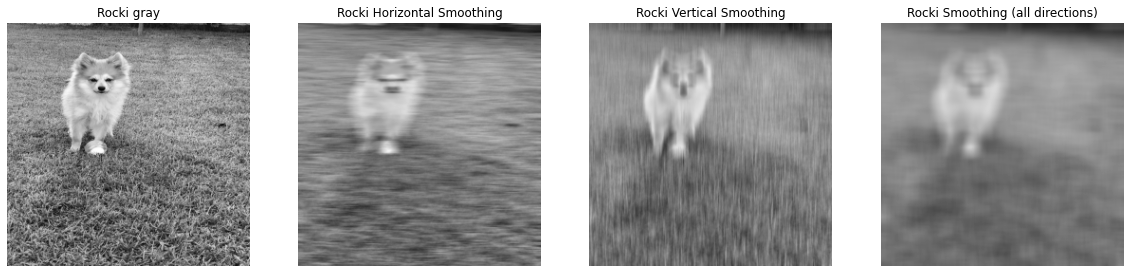

In [4]:
# We create the figure where we will display the different convolutions
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

# We will create  a method to display in the figure gray images without having to call each individual method everytime
def gray_plot(image, ax, title):
    ax.imshow(image, cmap='gray', vmin=0, vmax=1)
    ax.set(title=title)
    ax.axis('off')

# We will add all the images to the figure and show it
for title, image, ax in zip(rocki_titles, rocki_images, axs):
    gray_plot(image, ax, title)
plt.show()

c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


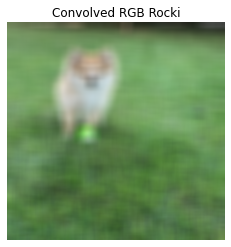

In [5]:
def conv_coor(image, mask):
    # We create a matrix with the same shape as the original but with all its values at zero
    convolved_image = np.zeros_like(image)

    # Then we will iterate over every channel to convolve them individually
    for i in range(3):
        # We assign to each channel from the zeros image the convolved channel from the original one 
        convolved_image[:, :, i] = convolve(image[:, :, i], mask)
    
    # We then show the image
    plt.imshow(convolved_image)
    plt.title('Convolved RGB Rocki')
    plt.axis('off')

conv_coor(rocki_thick, norm(mask_h2d))

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


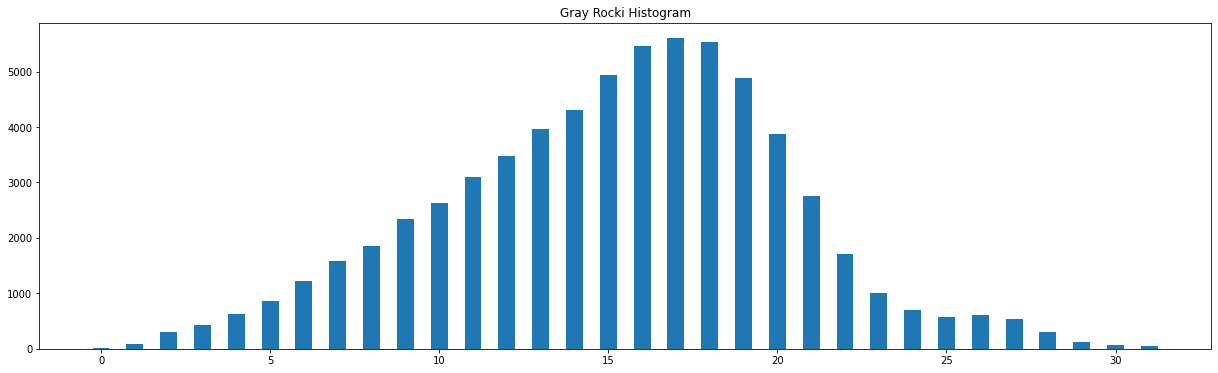

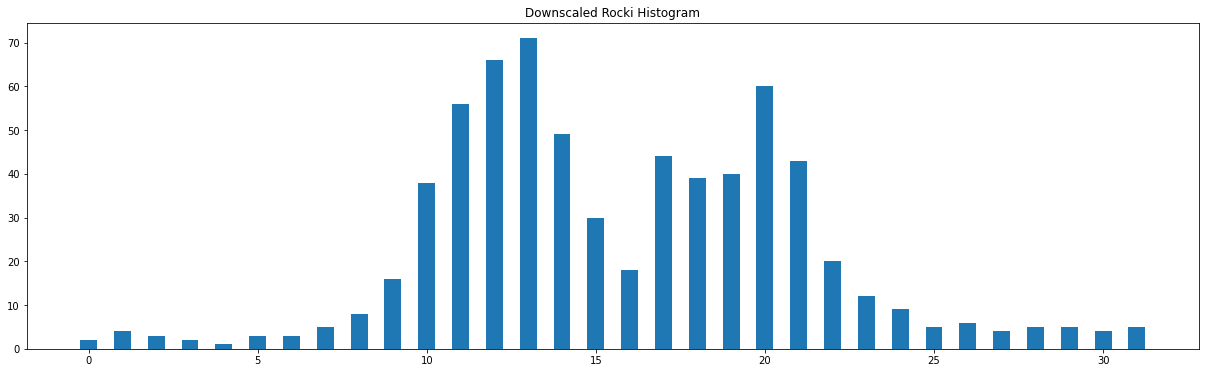

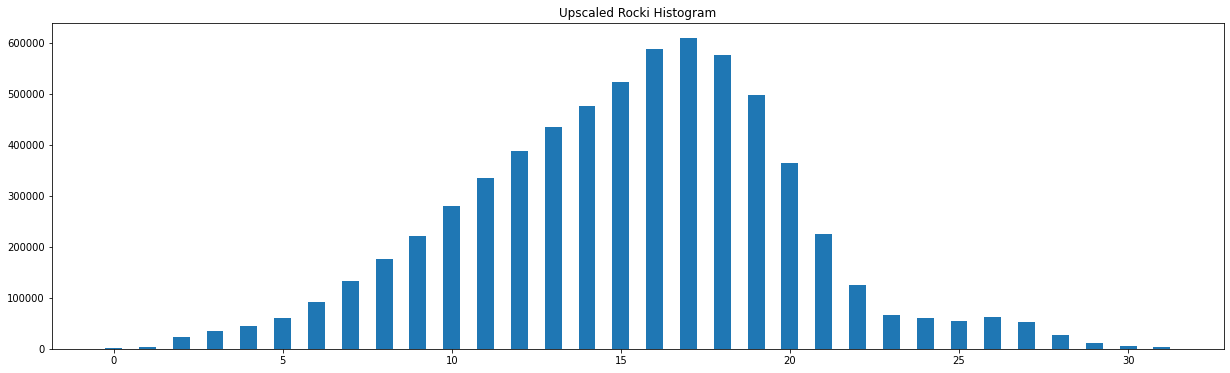

In [8]:
from skimage.transform import rescale

'''
The histogram of the original image and the 10x bigger image are similar. That's because expanding and image
by a factor of 10 probably simply duplies a lot of the existing pixels, and therefore they keep the same frequencies.

Scaling by a factor of 1/10 though changes drastically the image. That's because we are transforming the image
from 256x256 pixels to 26x26 pixels, which results in a really really small image. In the upper part of the grass
there's a lot more of light pixels than dark (the shade of the grass), so the middle gray is lost. In the lower part
of the grass, the shade of the grass wins and therefore the middle slighly bright gray is also lost.

We obtain 2 peaks, one for the upper brilliant grass and one for the darker bottom grass, and the transition between
them is lost, because with only 26x26 pixels we cannot convey more information than that.
'''

# Function to display a histogram of the different pixels of a gray image
def gray_hist(gray_im, title, nbins=32):
    hist = histogram(gray_im, nbins=nbins)
    fig = plt.figure(figsize=(21, 6))
    plt.title(title)
    plt.bar(x=range(nbins), height=hist[0], width=0.5)
    plt.show()

# We create both rescaled images as asked using skimage's rescale function
rocki_small = rescale(rocki_gray, 1/10)
rocki_big = rescale(rocki_gray, 10)

# Then we display each histogram
gray_hist(rocki_gray, 'Gray Rocki Histogram')
gray_hist(rocki_small, 'Downscaled Rocki Histogram')
gray_hist(rocki_big, 'Upscaled Rocki Histogram')

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray` image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

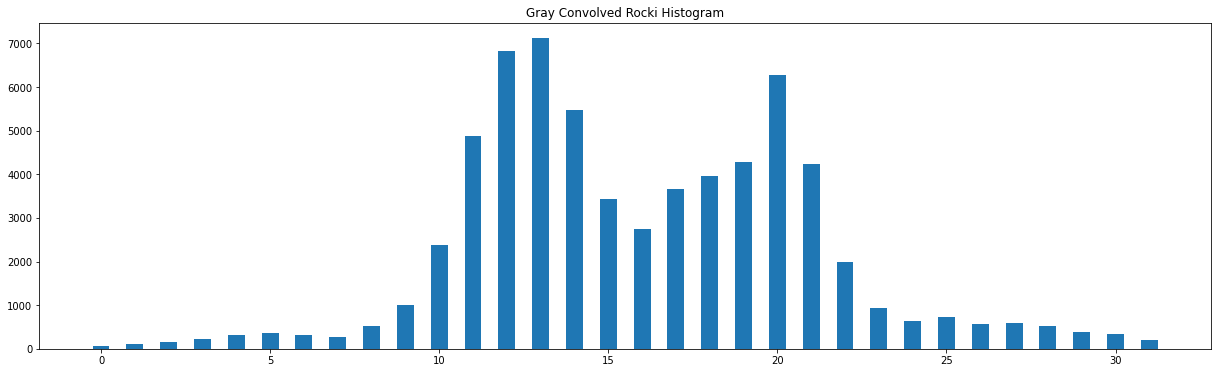

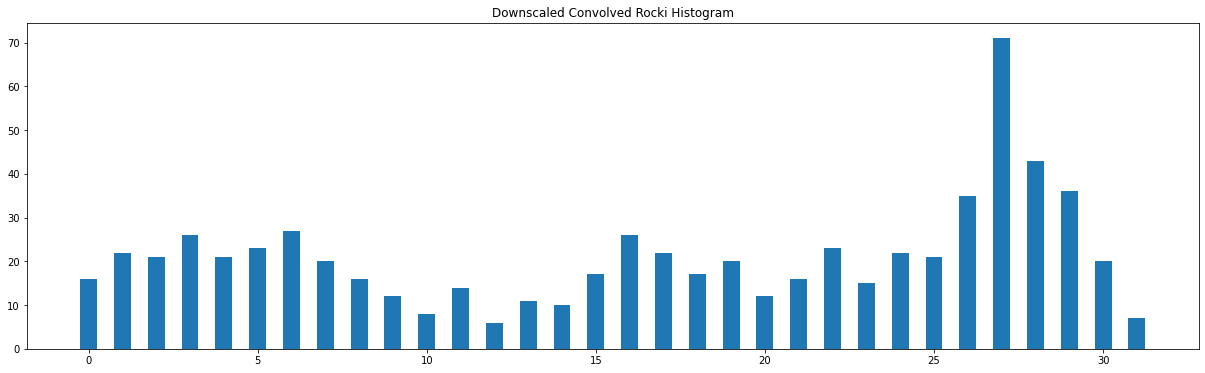

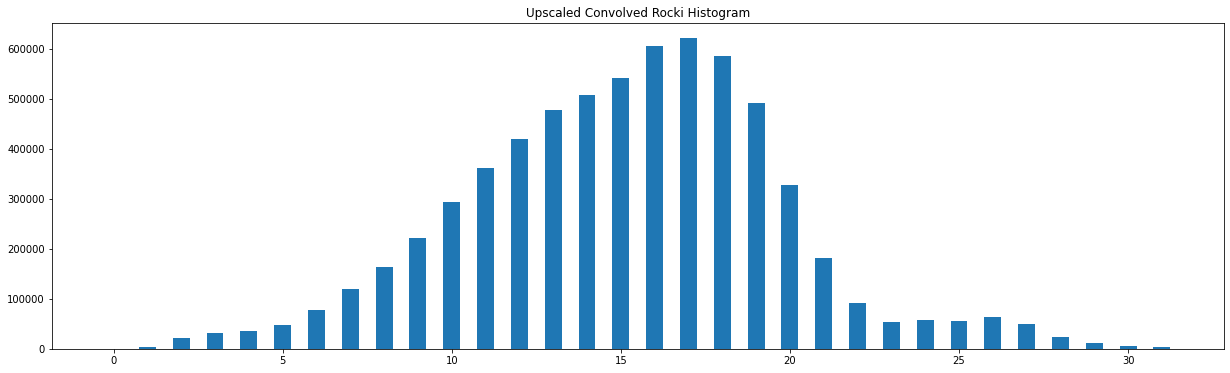

In [14]:
'''
The smoothing of the big image gives an histogram similar to the original image.
That's because we rescaled the image by a factor of 10, so the 7 pixels to any direction
proceeded from either the same pixel or the one next to it, so the average is close
to the pixel value and the smoothing of the image doesn't affect much the histogram.

In the smoothed normal size we see a similar pattern to the histogram of the reduced image.
The reason behind it is probably the same: the grass. The ligher upper grass will lose it's
shades (i. e. the grays in the middle) and the bottom darker grass will lose it's points of
light (i. e. the grays in the middle), and we get again the 2 peaks of gray.

In the smoothed small image we are averaging large parts of the image, so basically the
image is practically lost (it would be similar to applying a smoothing of 150x150 mask),
the image has lost all meaningul information and we can only see a gradient that the top
of the image had more light and the bottom was darker.
'''

# First we convolve each of the previously created images
rocki_gray_convolved = convolve(rocki_gray, norm(mask_h2d))
rocki_small_convolved = convolve(rocki_small, norm(mask_h2d))
rocki_big_convolved = convolve(rocki_big, norm(mask_h2d))

# And then we display the histograms
gray_hist(rocki_gray_convolved, 'Gray Convolved Rocki Histogram')
gray_hist(rocki_small_convolved, 'Downscaled Convolved Rocki Histogram')
gray_hist(rocki_big_convolved, 'Upscaled Convolved Rocki Histogram')

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

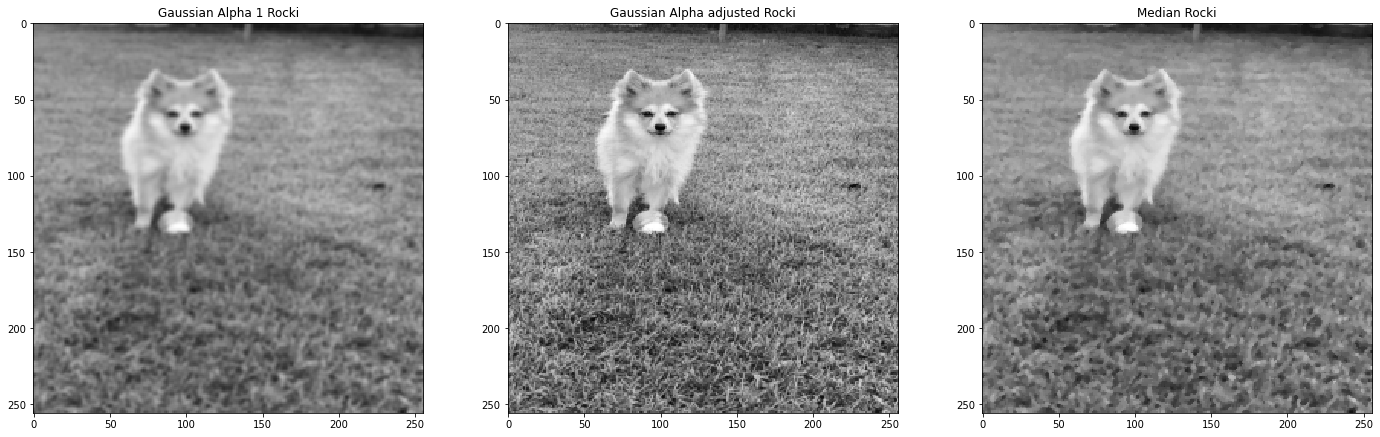

In [22]:
from skimage.filters import gaussian, median

'''
The difference between them are not clear at first sight, but looking carefully there are details that can give us an
idea of how each filter affects the image. We can see that the sigma 1 Gaussian filter smooths a little more than the
median filter. Furthermore, by looking at the dog's hair we can see that the median filter keeps the shape of the original
image better than the Gaussian. This is probably due to the median filter not making up new pixel colors for the image, while
the Gaussian does, which can give the effect of some details of the image getting lost due to pixels merging with other elements
of the image.

About the Gaussian with a different sigma, we used a very small sigma to see how it affects. We can see that it barely
smoothed it so, of course, it keeps the main objects and structures of the image, but if the original image had some
significant noise, it would not have done a good job removing it.
'''

# We create the figure for the 3 different applied kernels
fig, axs = plt.subplots(ncols=3, figsize=(21, 6))

# Gaussian kernel with sigma = 1 (default value)
io.imshow(gaussian(rocki_gray), ax=axs[0])

# Gaussian kernel with a different sigma, we used a small sigma value since the image does not have much noise
io.imshow(gaussian(rocki_gray, sigma=0.25), ax=axs[1])

# Median filter
io.imshow(median(rocki_gray), ax=axs[2])

axs[0].title.set_text('Gaussian Alpha 1 Rocki')
axs[1].title.set_text('Gaussian Alpha adjusted Rocki')
axs[2].title.set_text('Median Rocki')

plt.show()

b) **(Optional)** Apply the smoothing on some other images and present their results.

E:\Programas\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


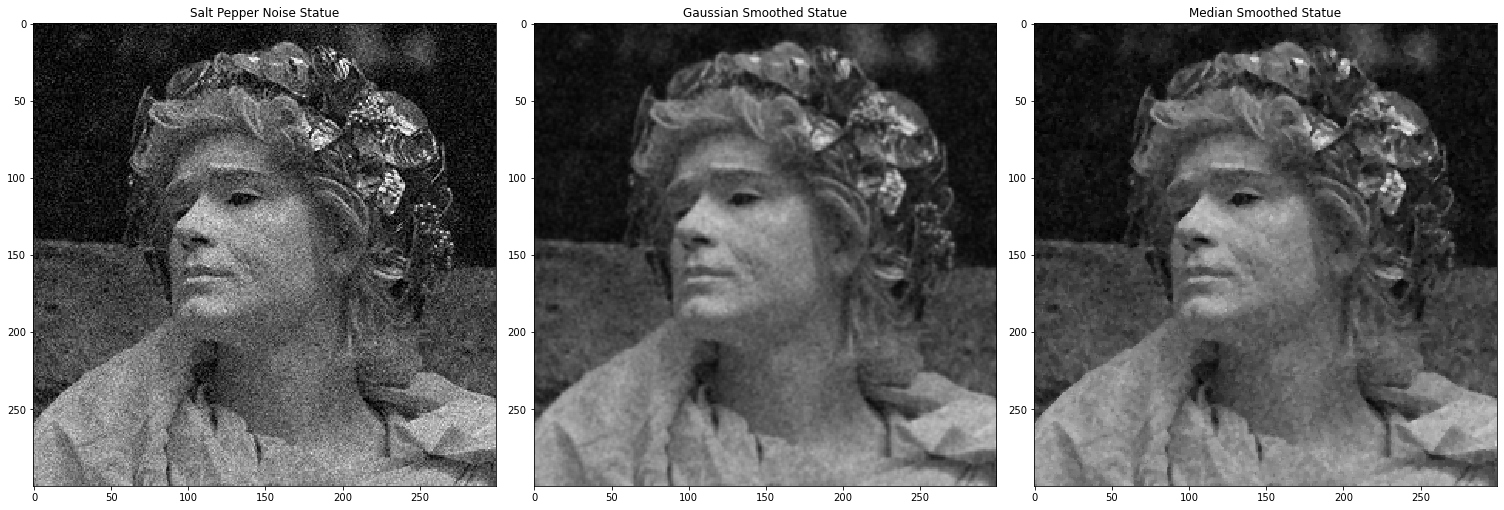

In [15]:
'''
We used an image with salt and pepper noise to see the effects of the
filters. We compared both gaussian and median. We can see that both
did a pretty good job and it is hard to tell which one is better, but
it somewhat looks like Gaussian does better for this type of noise.
Sigma = 0.9 has a good effect but there might be a specific sigma
that could clearly show us the superiority of this filter over
median (in this specific scenario of course).
'''

# We downloaded an example of an image with pepper and salt noise
statue = io.imread('images_notebook/statue_noise.jpg')

# We will show both the original and a gaussian and median filters for the image
fig, axs = plt.subplots(ncols=3, figsize=(21, 7))

io.imshow(statue, ax=axs[0])

# We used a sigma of 0.9 as it is a value that smooths it enough to remove a big part of the noise but also keeping most of its form
io.imshow(gaussian(statue, sigma=0.9), ax=axs[1])

io.imshow(median(statue), ax=axs[2])

axs[0].title.set_text('Salt Pepper Noise Statue')
axs[1].title.set_text('Gaussian Smoothed Statue')
axs[2].title.set_text('Median Smoothed Statue')

plt.show()

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

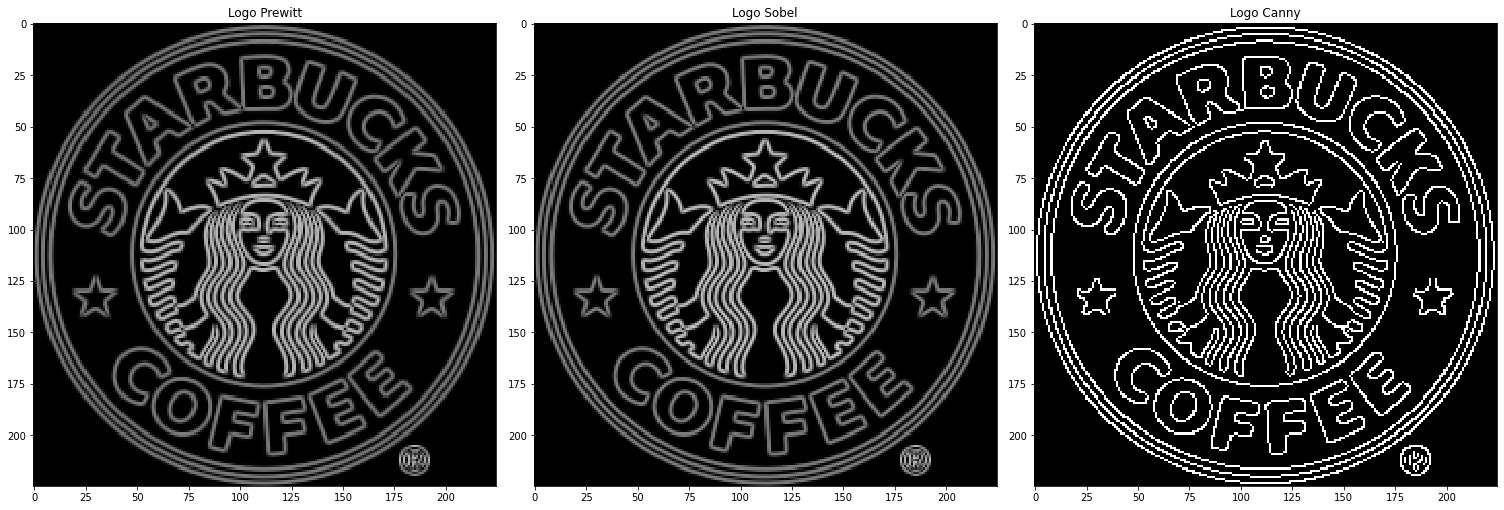

In [18]:
from skimage.color import rgba2rgb
from skimage.filters import prewitt, sobel
from skimage.feature import canny

'''
Sobel is better than Prewitt, because it gives double weight at the pixels directly next to
the center compare to the diagonal ones. This makes the sobel image look more defined and
the prewitt more smoothed.

The canny alogorithm looks quite good in this example, because the edges aren't ambiguous
and reducing them to 1 pixel width makes it look better. But in a general image, the edges
might be a lot more ambiguous and unless we find good parameters for the canny the image
can look really overloaded.

In this image there's no need to check for optimal parameters because it already looks fine.

It's not necessary to normalize the image when computing derivative, the only necessary
condition is that the mask must sum 0 so that constant regions get 0 derivatives.
When computing derivatives we don't care about the scale, only the relative difference
between pixels. We will paint at black the constant regions and white the most extreme values,
whatever they are.
'''

# We first read the logo image
logo_color = rgba2rgb(io.imread('images_notebook/logo.png'))
logo = rgb2gray(logo_color)

# Then we create the figure where we will show the 3 different countour detection techinque results
fig, axs = plt.subplots(ncols=3, figsize=(21,7))

# And of course we show them
io.imshow(prewitt(logo), ax=axs[0])
io.imshow(sobel(logo), ax=axs[1])
io.imshow(canny(logo), ax=axs[2])

axs[0].title.set_text('Logo Prewitt')
axs[1].title.set_text('Logo Sobel')
axs[2].title.set_text('Logo Canny')

plt.show()

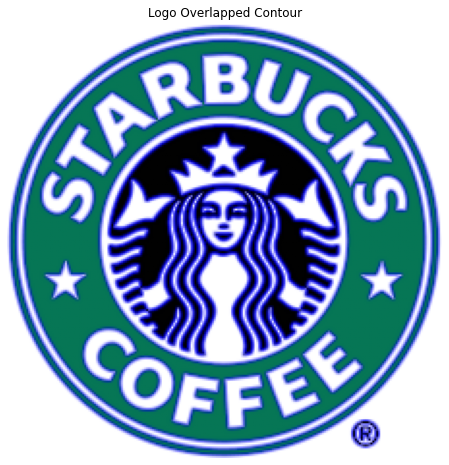

In [18]:
'''
In order to show the edges in the original image we will combine 2 images: the original image and an
arbitrary color with which we will paint the edges. Every pixel will be painted with the formula:
(1 - sobel) * original_pixel + sobel * arbitrary_color, so that the pixels where the derivative is 0
are painted with the original_pixel and where the sobel is 1 are painted only with the arbitrary color.
The rest of pixels are in between and the edge color proportional to the derivative.

As arbitrary color we chose blue, because the image is mainly green and with blue look better than red.
'''

# We add another dimension so we can broacdast to multiply it with the RGB image
intensity = sobel(logo).reshape((logo.shape[0], logo.shape[1], 1))

arbitrary_color = [0, 0, 1] # Blue

# The in-pixel combination
logo_with_edges = logo_color * (1-intensity) + [[arbitrary_color]] * intensity

plt.figure(figsize=(8, 8))
plt.imshow(logo_with_edges)
plt.title('Logo Overlapped Contour')
plt.axis('off')
plt.show()

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

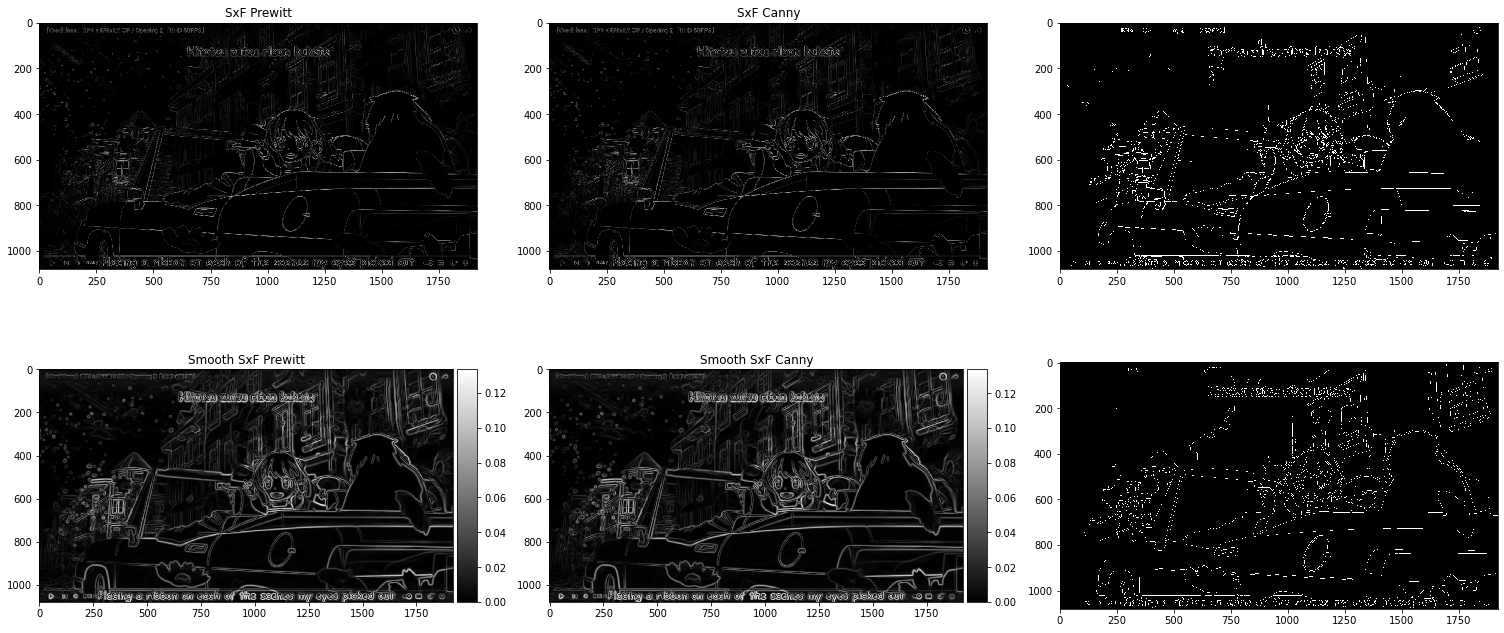

In [35]:
'''
Previously smoothing dramatically improved the contours in the prewitt and sobel methods.
The Canny one looks a bit worse because there are a lot of edges and it's difficult to
emphatize only the important contours.

Probably it's better to use canny when the are less edges and are more well defined and
sobel with smoothing in slighly ambiguous images
'''

# We will read an image from an animated series, specifically a frame with a lot of items
spy_family_op = io.imread('images_notebook/spy_familiy_op.jpg')

# First we turn the image to grayscale 
spy_family_op = rgb2gray(spy_family_op)

# We create once again a figure to show the different techniques
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(21, 12))

# We will apply the default prewitt and sobel
io.imshow(prewitt(spy_family_op), ax=axs[0, 0])
io.imshow(sobel(spy_family_op), ax=axs[0, 1])

# For canny, we have tried different parameters and settled with ones that produced a somewhat decent result.
# if the high_threshold is lower, more edges are connected. If the low_threshold is bigger, more edges are connected.
# The sigma is for the gaussian transformation, which smooths the image
io.imshow(canny(spy_family_op, sigma=1, low_threshold=0.7, high_threshold=0.98, use_quantiles=True), ax=axs[0, 2])

axs[0, 0].title.set_text('SxF Prewitt')
axs[0, 1].title.set_text('SxF Sobel')
axs[0, 1].title.set_text('SxF Canny')


# The same but applying gauss with sigma = 3

smooth_spy_family = gaussian(spy_family_op, 3)

io.imshow(prewitt(smooth_spy_family), ax=axs[1, 0], cmap='gray')
io.imshow(sobel(smooth_spy_family), ax=axs[1, 1], cmap='gray')

axs[1, 0].title.set_text('Smooth SxF Prewitt')
axs[1, 1].title.set_text('Smooth SxF Sobel')
axs[1, 1].title.set_text('Smooth SxF Canny')

io.imshow(canny(spy_family_op, sigma=3, low_threshold=0.7, high_threshold=0.95, use_quantiles=True), ax=axs[1, 2])

plt.show()


c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


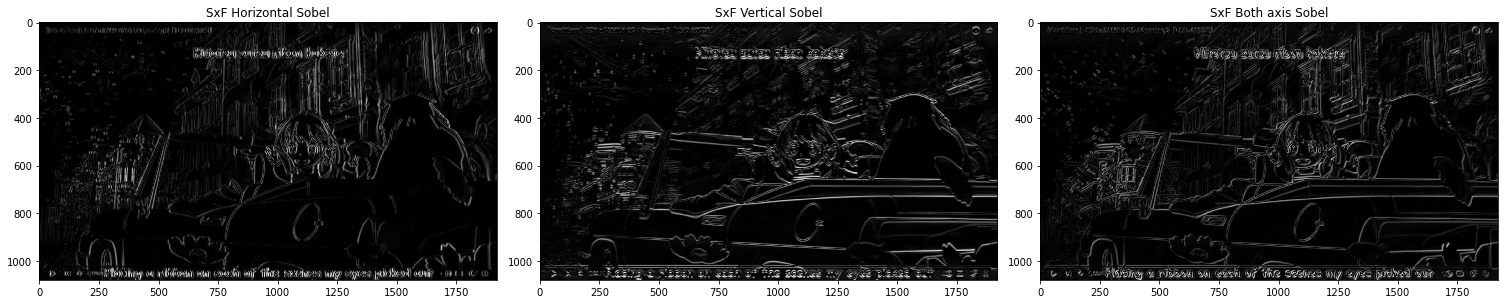

In [40]:
'''
It can be applied horizontally, vertically or in both directions.
The horizontal derivative (x) gives the vertical edges.
The vertical derivative (y) gives the horizontal edges.
The all directions derivative gives all the edges
'''

smooth2_spy_family = gaussian(spy_family_op, sigma=2.5)

# First we create the default mask for the Sobel detector
horizontal_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Then we apply modifications on the array, such as making it vertical by transposing
vertical_sobel = horizontal_sobel.T

# Or also both vertical and horizontal by adding them together
both_sobel = horizontal_sobel + vertical_sobel

# We will once again create the figure with the different values
fig, axs = plt.subplots(ncols=3, figsize=(21,7))

# We create a function to normalize the matrix (but now works with negatives too)
def abs_norm(M):
    M = np.abs(M)
    return M / M.max()

# We then show each by applying the convolve method with each normalized mask
io.imshow(abs_norm(convolve(smooth2_spy_family, horizontal_sobel)), ax=axs[0])
io.imshow(abs_norm(convolve(smooth2_spy_family, vertical_sobel)), ax=axs[1])
io.imshow(abs_norm(convolve(smooth2_spy_family, both_sobel)), ax=axs[2])

axs[0].title.set_text('SxF Horizontal Sobel')
axs[1].title.set_text('SxF Vertical Sobel')
axs[2].title.set_text('SxF Both axis Sobel')

plt.show()

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png">
<img src="images_notebook/Ironman.png">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

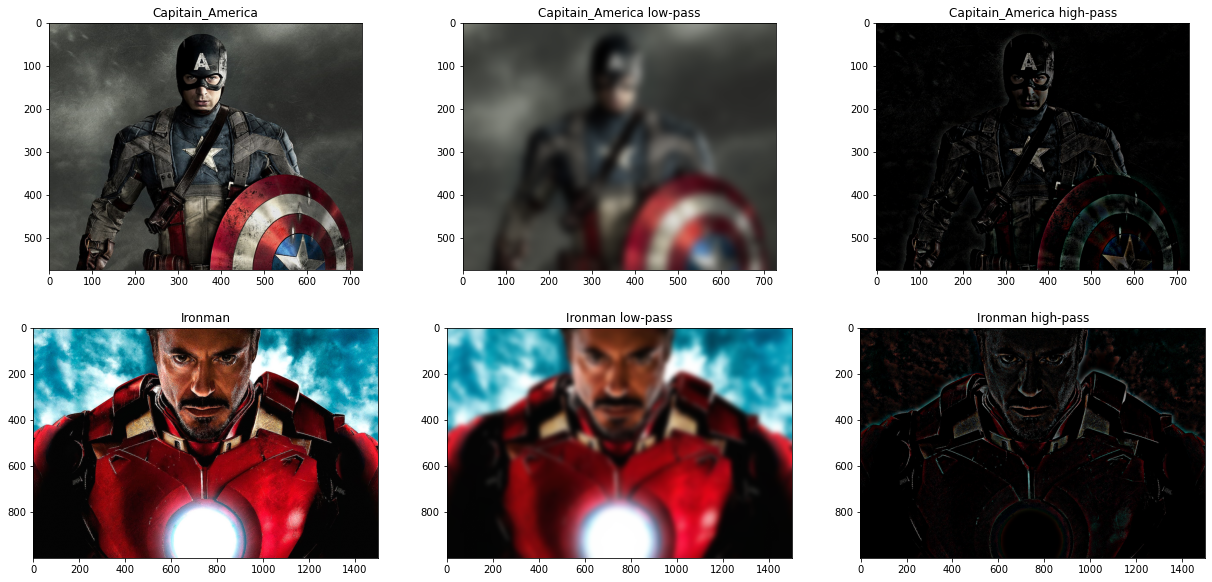

In [21]:
from skimage import img_as_float

# We create the figure to show each of the images in the original, low-pass and high-pass versions
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(21, 10))

# We create a dictionary to store the low and high images dinamically in the loop (since we will read the images inside the loop)
# This will also make it easier to use them in the following exercises
images = {}

# We iterate over the image names to avoid redundant code
for i, image_name in enumerate(['Capitain_America', 'Ironman']):

    # We read the image based off the image name of the current iteration
    image = img_as_float(io.imread(f'images_notebook/{image_name}.jpg'))

    # We add the low-pass image by smoothing it, we applied the gaussian function with a high enough sigma
    images[(image_name, 'low')] = gaussian(image, sigma=10)

    # Then we add the high-pass image by substracting the low-pass one to the original
    images[(image_name, 'high')] = (image - images[(image_name, 'low')]).clip(0)

    # We then add the image to the figure
    axs[i, 0].imshow(image)
    axs[i, 0].title.set_text(image_name)
    axs[i, 1].imshow(images[(image_name, 'low')])
    axs[i, 1].title.set_text(image_name + ' low-pass')
    axs[i, 2].imshow(images[(image_name, 'high')])
    axs[i, 2].title.set_text(image_name + ' high-pass')

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png">


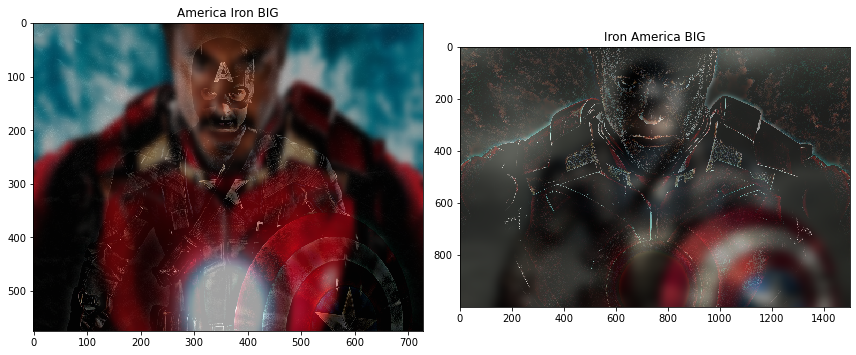

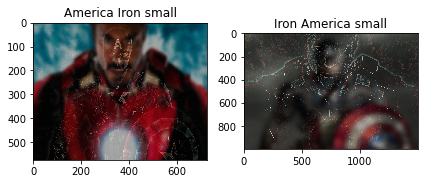

In [22]:
'''
The best way to see Ironman's face is visualizing a smaller scale hybrid image where Ironman's image
is the low-pass one. The high-pass Ironman with the bigger scale hybrid image is also good to see Ironman's
face, but the low-pass captain america is not subtle enough and it makes it hard to see the Ironman image
clearly.

If we see a big hybrid image we tend to see the high frequency image, and if it's really small we tend
to see the low frequency image. But if the images have really different colors we simply see both images
and it looks a bit weird.
'''

# We create the images by applying the hybrid formula but first we resize the low-pass image to match the high-pass's shape
america_iron = images[('Capitain_America', 'high')] + resize(images[('Ironman', 'low')], images[('Capitain_America', 'high')].shape)
iron_america = images[('Ironman', 'high')] + resize(images[('Capitain_America', 'low')], images[('Ironman', 'high')].shape)

# We need to normalize the images so they are in the range [0, 1] (we combined 2 images, so they could go up to 2)
america_iron = america_iron / america_iron.max()
iron_america = iron_america / iron_america.max()

# We show the hybrid images in a big scale
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
io.imshow(america_iron, ax=axs[0])
io.imshow(iron_america, ax=axs[1])
axs[0].title.set_text('America Iron BIG')
axs[1].title.set_text('Iron America BIG')

# We show the hybrid images in a small scale
fig, axs1 = plt.subplots(ncols=2, figsize=(6, 3))
io.imshow(america_iron, ax=axs1[0])
io.imshow(iron_america, ax=axs1[1])
axs1[0].title.set_text('America Iron small')
axs1[1].title.set_text('Iron America small')
plt.show()

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


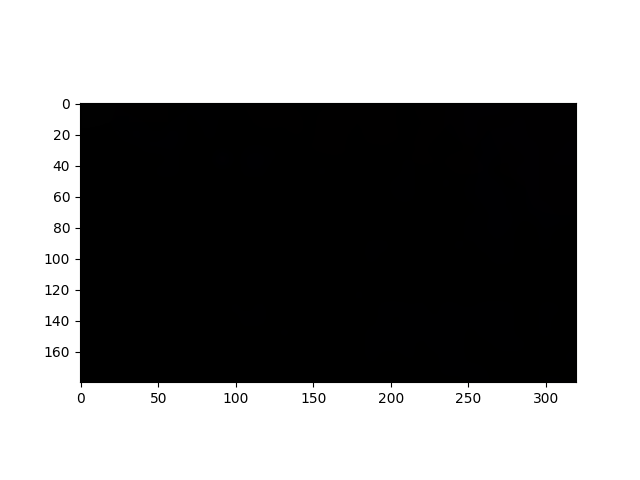

In [41]:
# We used the provided and modified it to apply the blur directly

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

import warnings
warnings.filterwarnings("ignore")

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale = 0.5
frames = len(ic)
height = np.int((ic[0].shape[0])*scale)
width = np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small = np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
    '''HERE WE APPLIED THE SMOOTHING OF EACH FRAME APPLYING A BIG ENOUGH SIGMA
    THE CHOSEN SIGMA INTENDS TO MAKE IT HARD TO DETECT THE FEATURES AND DETAILS
    OF THE OBJECTS APPEARING IN THE VIDEO BUT STILL BE ABLE TO DIFFERENTIATE THE
    SHAPES AND DISTINGUISH BETWEEN THEM'''

    ic_small[:,:,:,i] = transform.rescale(gaussian(ic[i], sigma=6.9), scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

# THIS LINE ALLOWS US TO SEE THE VIDEO (MAYBE A TECHNICAL ISSUE)
# the origina was %matplotlib nbagg
%matplotlib ipympl

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()
